## LR model using dummies and and One hot encoding for categorical column

In [1]:
# import library functions
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("homeprices_dummies.csv")
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [3]:
# create a dummy columns for town variable
dummeis = pd.get_dummies(df.town)
dummeis 

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [4]:
merge = pd.concat([df, dummeis], axis = 'columns')
merge

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [5]:
# need to drop originL town column and one of the dummy variable column to avoid dummy variable trap
df_final = merge.drop(['town', 'west windsor'], axis = 'columns')
df_final

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [6]:
X = df_final.drop('price', axis = 'columns')
X

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [7]:
y = df_final.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [8]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [9]:
reg.score(X,y)

0.9573929037221873

In [10]:
reg.predict([[2800, 0, 1]])

array([590775.63964739])

In [11]:
# price in west windsor - thrid column should be 1, rest of the columns should be zero 
reg.predict([[3400, 0, 0]])

array([681241.66845839])

# Using One Hot Encoding 

In [12]:
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [13]:
# first complete label encoding for town column

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
# copy dataframe into new data frame

dfle = df
dfle.town = le.fit_transform(dfle.town)

In [15]:
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [16]:
# take X variable as array instead of dataframe , hence usign values
X1 = dfle[['town', 'area']].values
X1

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

In [17]:
y1 = dfle.price
y1

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [18]:
# now use one hot encoder to create dummy variables for town column
# As per latest verson sklearn function, categorical_features have been discontinued and suggested below ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ohe = ColumnTransformer([("town", OneHotEncoder(), [0])], remainder = 'passthrough') # need to specify which column are categorical values 

In [19]:
X1 = ohe.fit_transform(X1.tolist())
X1

array([[1.0, 0.0, 0.0, 2600],
       [1.0, 0.0, 0.0, 3000],
       [1.0, 0.0, 0.0, 3200],
       [1.0, 0.0, 0.0, 3600],
       [1.0, 0.0, 0.0, 4000],
       [0.0, 0.0, 1.0, 2600],
       [0.0, 0.0, 1.0, 2800],
       [0.0, 0.0, 1.0, 3300],
       [0.0, 0.0, 1.0, 3600],
       [0.0, 1.0, 0.0, 2600],
       [0.0, 1.0, 0.0, 2900],
       [0.0, 1.0, 0.0, 3100],
       [0.0, 1.0, 0.0, 3600]], dtype=object)

In [20]:
X1 = X1[:, 1:]
X1

array([[0.0, 0.0, 2600],
       [0.0, 0.0, 3000],
       [0.0, 0.0, 3200],
       [0.0, 0.0, 3600],
       [0.0, 0.0, 4000],
       [0.0, 1.0, 2600],
       [0.0, 1.0, 2800],
       [0.0, 1.0, 3300],
       [0.0, 1.0, 3600],
       [1.0, 0.0, 2600],
       [1.0, 0.0, 2900],
       [1.0, 0.0, 3100],
       [1.0, 0.0, 3600]], dtype=object)

In [21]:
reg1 = LinearRegression()
reg1.fit(X1,y1)

LinearRegression()

In [22]:
reg1.coef_

array([25686.4115244 , 40013.97548914,   126.89744141])

In [23]:
reg1.intercept_

209776.39217373997

In [24]:
reg1.score(X1, y1)

0.9573929037221873

In [25]:
reg1.predict([[1, 0, 2800]])

array([590775.63964739])

In [26]:
reg1.predict([[0, 1, 3400]])

array([681241.6684584])

## EXCERCISE 

In [27]:
### Data available on used car sales with model, age and milage and price sold
### Predict price of benz that is 4 years hold and done mileage 45000
### Predict price of BMW X5 that is 7 years hold and done mileage 86000
### Tell accuracy of model using linearregression.score and also check data suitable for linear regression model 

In [28]:
# read input file 
df_car = pd.read_csv("carprices.csv")
df_car

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [29]:
# change column heading
df_car = df_car.rename(columns = {'Car Model': 'Car_Model', 'Sell Price($)': 'Sell_Price_USD', 'Age(yrs)': 'Age_in_Years'})
df_car.columns

Index(['Car_Model', 'Mileage', 'Sell_Price_USD', 'Age_in_Years'], dtype='object')

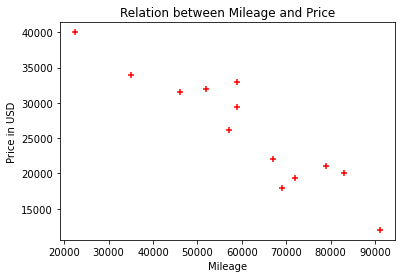

In [30]:
# plot scatter plot to understand relation between mileage vs price, age vs price
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel('Mileage')
plt.ylabel('Price in USD')
plt.title('Relation between Mileage and Price')
plt.scatter(df_car.Mileage, df_car.Sell_Price_USD, color = 'red', marker = '+')

# It can be clearly shown from below scatter plot , there is a negative linear correlation between mileage and sell price

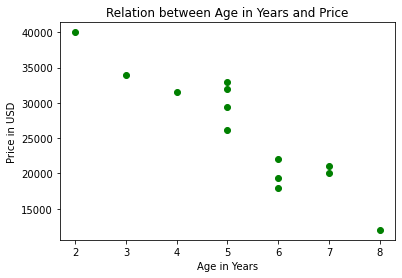

In [31]:
plt.xlabel('Age in Years')
plt.ylabel('Price in USD')
plt.title('Relation between Age in Years and Price')
plt.scatter(df_car.Age_in_Years, df_car.Sell_Price_USD, color = 'green')

# It can be clearly shown from below scatter plot , there is a negative linear correlation between age and sell price

In [32]:
# using Dummy column 
dummy = pd.get_dummies(df_car.Car_Model)
dummy

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [33]:
# merge dummy columns with original dataframe
df_car_dummy = pd.concat([df_car, dummy], axis = 1)
df_car_dummy

,Car_Model,Mileage,Sell_Price_USD,Age_in_Years,Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [34]:
# need to drop originL car_model column and one of the dummy variable column to avoid dummy variable trap
df_car_dummy_final = df_car_dummy.drop(['Car_Model', 'Mercedez Benz C class'], axis = 'columns')
df_car_dummy_final

,Mileage,Sell_Price_USD,Age_in_Years,Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [35]:
# create an independent variable dataframe (X) - Mileage, Age and Models
X2 = df_car_dummy_final.drop('Sell_Price_USD', axis = 1)
X2

,Mileage,Age_in_Years,Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [36]:
# create an dependent variable dataframe (y) - Price 
y2 = df_car_dummy_final.Sell_Price_USD
y2

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell_Price_USD, dtype: int64

In [37]:
# fit the model
reg2 = LinearRegression()
reg2.fit(X2, y2)

LinearRegression()

In [38]:
# Predict price of benz - third column in models (0 0) (thrid column assume to be 1 in this case) that is 4 years hold and done mileage 45000
reg2.predict([[45000, 4, 0, 0]])

array([36991.31721061])

In [39]:
### Predict price of BMW X5 that is 7 years hold and done mileage 86000
reg2.predict([[86000, 7, 0, 1]])

array([11080.74313219])

In [40]:
### Tell accuracy of model using linearregression.score and also check data suitable for linear regression model 
reg2.score(X2,y2)

0.9417050937281083

# using OneHotEncoder

In [41]:
# original data frame
df_car

,Car_Model,Mileage,Sell_Price_USD,Age_in_Years
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [42]:
# assign laber encoder
from sklearn.preprocessing import LabelEncoder
le_car = LabelEncoder()

In [43]:
# copy the the dataframe
df_car_le = df_car
df_car_le

,Car_Model,Mileage,Sell_Price_USD,Age_in_Years
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [44]:
df_car_le.Car_Model = le_car.fit_transform(df_car_le.Car_Model)
df_car_le

,Car_Model,Mileage,Sell_Price_USD,Age_in_Years
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [45]:
# define X3 as independent variable with Car_model, mileage and age in years
X3 = df_car_le[['Car_Model', 'Mileage', 'Age_in_Years']].values
X3

array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]], dtype=int64)

In [46]:
# define y3 as dependent variable with Sell price 
y3 = df_car_le.Sell_Price_USD
y3

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell_Price_USD, dtype: int64

In [47]:
# now use one hot encoder to create dummy variables for Car Model column
# As per latest verson sklearn function, categorical_features have been discontinued and suggested below ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ohe1 = ColumnTransformer([("Car_Model", OneHotEncoder(), [0])], remainder = 'passthrough') # need to specify which column are categorical values 

In [48]:
X3 = ohe1.fit_transform(X3.tolist())
X3

array([[0.0, 1.0, 0.0, 69000, 6],
       [0.0, 1.0, 0.0, 35000, 3],
       [0.0, 1.0, 0.0, 57000, 5],
       [0.0, 1.0, 0.0, 22500, 2],
       [0.0, 1.0, 0.0, 46000, 4],
       [1.0, 0.0, 0.0, 59000, 5],
       [1.0, 0.0, 0.0, 52000, 5],
       [1.0, 0.0, 0.0, 72000, 6],
       [1.0, 0.0, 0.0, 91000, 8],
       [0.0, 0.0, 1.0, 67000, 6],
       [0.0, 0.0, 1.0, 83000, 7],
       [0.0, 0.0, 1.0, 79000, 7],
       [0.0, 0.0, 1.0, 59000, 5]], dtype=object)

In [52]:
# Drop the first column to dummy trap
X3 = X3[:, 1:]
X3

array([[1.0, 0.0, 69000, 6],
       [1.0, 0.0, 35000, 3],
       [1.0, 0.0, 57000, 5],
       [1.0, 0.0, 22500, 2],
       [1.0, 0.0, 46000, 4],
       [0.0, 0.0, 59000, 5],
       [0.0, 0.0, 52000, 5],
       [0.0, 0.0, 72000, 6],
       [0.0, 0.0, 91000, 8],
       [0.0, 1.0, 67000, 6],
       [0.0, 1.0, 83000, 7],
       [0.0, 1.0, 79000, 7],
       [0.0, 1.0, 59000, 5]], dtype=object)

In [53]:
reg3 = LinearRegression()
reg3

LinearRegression()

In [54]:
reg3.fit(X3,y3)

LinearRegression()

In [56]:
# Predict price of benz - third column in models (0 0) (thrid column assume to be 1 in this case) that is 4 years hold and done mileage 45000
reg3.predict([[0, 1, 45000, 4]])

array([36991.31721062])

In [58]:
### Predict price of BMW X5 that is 7 years hold and done mileage 86000
reg3.predict([[1, 0, 86000, 7]])

array([11080.74313219])

In [59]:
reg3.score(X3,y3)

0.9417050937281082